In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [2]:
transformer_train = transforms.Compose([transforms.RandomCrop(32,padding=4), transforms.RandomHorizontalFlip(p=0.5),transforms.RandomAffine(0,translate=(0.1,0.1)), transforms.ToTensor()])

In [3]:
train_cifar = torchvision.datasets.CIFAR10(root = ".",train = "True",transform=transformer_train,download = True)

Files already downloaded and verified


In [4]:
test_cifar = torchvision.datasets.CIFAR10(root=".", train = False, download = True, transform=transforms.ToTensor())

Files already downloaded and verified


In [5]:
train_cifar.data.shape

(50000, 32, 32, 3)

In [6]:
test_cifar.data.shape

(10000, 32, 32, 3)

In [7]:
#Building the model

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.conv1 = nn.Sequential(nn.Conv2d(3,32,kernel_size=3,padding =1),
                               nn.ReLU(),
                               nn.BatchNorm2d(32),
                               nn.Conv2d(32,32,kernel_size=3,padding =1),
                               nn.ReLU(),
                               nn.BatchNorm2d(32),
                               nn.MaxPool2d(2)
)
    
    self.conv2 = nn.Sequential(nn.Conv2d(32,64,kernel_size=3,padding =1),
                               nn.ReLU(),
                               nn.BatchNorm2d(64),
                               nn.Conv2d(64,64,kernel_size=3,padding=1),
                               nn.ReLU(),
                               nn.BatchNorm2d(64),
                               nn.MaxPool2d(2)
                      )
    self.conv3 = nn.Sequential(nn.Conv2d(64,128,kernel_size=3,padding =1),
                               nn.ReLU(),
                               nn.BatchNorm2d(128),
                               nn.Conv2d(128,128,kernel_size=3,padding =1),
                               nn.ReLU(),
                               nn.BatchNorm2d(128),
                               nn.MaxPool2d(2))
    

    self.fc1 = nn.Linear(128*4*4,1024)
    self.fc2 = nn.Linear(1024,10)

  def forward(self,x):

    out = self.conv1(x)
    out = self.conv2(out)
    out = self.conv3(out)
    out = out.view(-1,128*4*4)
    out = F.dropout(out,p=0.5)
    out = self.fc1(out)
    out = F.dropout(out,p=0.2)
    out = self.fc2(out)
    return out


In [8]:
model = CNN()

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

In [10]:
#dataloaders

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_cifar,batch_size = batch_size,shuffle =True)
test_loader = torch.utils.data.DataLoader(dataset = test_cifar, batch_size = batch_size, shuffle = False )

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [12]:
#training

epochs = 80
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)

for i in range(epochs):

  model.train()
  losses_train  = []
  for inputs,targets in train_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    optimizer.zero_grad()
    

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    losses_train.append(loss_train.item())

  losses_train = np.mean(losses_train)

  train_loss[i] = losses_train


  model.eval()
  losses_test = []

  for inputs,targets in test_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)

    losses_test.append(loss_test.item())

  losses_test = np.mean(losses_test)

  test_loss[i] = losses_test


  print(f"epoch -- {i+1}/{epochs} , training loss -- {losses_train}, test loss -- {losses_test}")







    



epoch -- 1/80 , training loss -- 1.7495647973721595, test loss -- 1.2322763596908957
epoch -- 2/80 , training loss -- 1.1548258239960731, test loss -- 1.0613472454155548
epoch -- 3/80 , training loss -- 0.9644993639663052, test loss -- 0.8531454039525382
epoch -- 4/80 , training loss -- 0.8481583522103936, test loss -- 0.927226640001128
epoch -- 5/80 , training loss -- 0.7737556991674711, test loss -- 0.9377197268642957
epoch -- 6/80 , training loss -- 0.7091775978617656, test loss -- 0.7493497050261195
epoch -- 7/80 , training loss -- 0.6562392790909009, test loss -- 0.7089304690119587
epoch -- 8/80 , training loss -- 0.6226669824336801, test loss -- 0.6525031716763219
epoch -- 9/80 , training loss -- 0.5857537817924529, test loss -- 0.5997068727318244
epoch -- 10/80 , training loss -- 0.5660358130017205, test loss -- 0.5807987078081204
epoch -- 11/80 , training loss -- 0.541577543748919, test loss -- 0.6537272639666931
epoch -- 12/80 , training loss -- 0.5189366644758093, test loss -

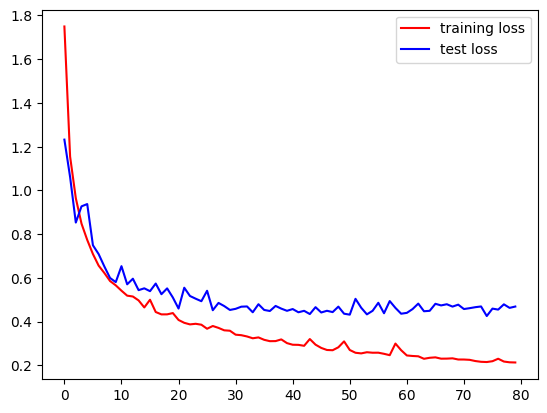

In [13]:
plt.plot(train_loss,label = "training loss",c = "r")
plt.plot(test_loss,label = "test loss",c = "b")
plt.legend()
plt.show()

In [14]:
model.eval()

n_correct = 0
n_total = 0 

for inputs,targets in train_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _ , preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)


train_acc = n_correct/n_total




n_correct = 0 
n_total = 0
for inputs,targets in test_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _, preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)

test_acc = n_correct/n_total


print(f"training accuracy -- {train_acc} , test accuracy -- {test_acc}")

training accuracy -- 0.9324 , test accuracy -- 0.8746


In [18]:
from torchsummary import summary
summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6